### 股票選擇、讀資料

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
class bcolors:
    OK = '\033[92m' #GREEN
    WARNING = '\033[93m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR
financial_statement_path = r'C:\Users\User\Desktop\stockchoose\history_financial_statement_data\financial_statement_data.xlsx'
financial_statement_df = pd.read_excel(financial_statement_path)
print('OK')
monthly_revenue_path = r'C:\Users\User\Desktop\stockchoose\history_month_revenue_data\monthly_revenue_data.xlsx'
monthly_revenue_df = pd.read_excel(monthly_revenue_path)
print('OK')
financial_statement_df['ID'] = financial_statement_df['ID'].astype(str)
monthly_revenue_df['ID'] = monthly_revenue_df['ID'].astype(str)

OK
OK


In [3]:
class StockFundamental():
    def __init__(self, stockID, fig_num = 4, fig_index = 6, latest_quarter_num = -1, initial_time = '2023-01-01', end_time = '2025-01-31', financial_statement_df:pd.DataFrame = None, monthly_revenue_df:pd.DataFrame = None):
        
        self.initial_time = initial_time
        self.end_time = end_time
        self.stockID = stockID

        self.financial_statement_df = financial_statement_df
        # print(self.financial_statement_df)
        self.financial_statement_df['ID'] = financial_statement_df['ID'].astype(str)
        self.financial_statement_df = financial_statement_df.loc[financial_statement_df['ID']==stockID]
        self.financial_statement_df['update_date'] = pd.to_datetime(self.financial_statement_df['update_date'])
        self.financial_statement_df = self.financial_statement_df[self.financial_statement_df['update_date']>=self.initial_time]
        # print(self.financial_statement_df)
        self.financial_statement_df = self.financial_statement_df[self.financial_statement_df['update_date']<=self.end_time]
        # print(self.financial_statement_df)
        self.financial_statement_df['Rev_Q_Y'] = self.financial_statement_df['Rev_Q'].astype(str).apply(lambda x:x+'Q')+self.financial_statement_df['Rev_Y'].astype(str).apply(lambda x:x[-2:])
        # print(self.financial_statement_df)
        self.IAT_df = self.financial_statement_df[['ID','Rev_Q','Rev_Y','Rev_Q_Y','update_date','Y','M','D','IAT','IAT_R','IAT_R_YoY','IAT_R_QoQ','IAT_R_YoY_AVG_2Q','IAT_R_YoY_AVG_2Q_Diff']]
        self.IAT_df = self.IAT_df.set_index('ID')
        self.Q_Rev_df = self.financial_statement_df[['ID','Rev_Q','Rev_Y','Rev_Q_Y','update_date','Y','M','D','Q_Rev','Q_Rev_YoY','Q_Rev_QoQ','Q_Rev_YoY_AVG_2Q','Q_Rev_YoY_AVG_2Q_Diff']]
        self.Q_Rev_df = self.Q_Rev_df.set_index('ID')
        self.EPS_df = self.financial_statement_df[['ID','Rev_Q','Rev_Y','Rev_Q_Y','update_date','Y','M','D','EPS','EPS_YoY','EPS_QoQ','EPS_YoY_AVG_2Q','EPS_YoY_AVG_2Q_Diff']]
        self.EPS_df = self.EPS_df.set_index('ID')
        self.OI_df = self.financial_statement_df[['ID','Rev_Q','Rev_Y','Rev_Q_Y','update_date','Y','M','D','OI','OI_R','OI_R_YoY','OI_R_QoQ','OI_R_YoY_AVG_2Q','OI_R_YoY_AVG_2Q_Diff']]
        self.OI_df = self.OI_df.set_index('ID')
        self.GP_df = self.financial_statement_df[['ID','Rev_Q','Rev_Y','Rev_Q_Y','update_date','Y','M','D','GP','GP_R','GP_R_YoY','GP_R_QoQ','GP_R_YoY_AVG_2Q','GP_R_YoY_AVG_2Q_Diff']]
        self.GP_df = self.GP_df.set_index('ID')
    
        self.monthly_revenue_df = monthly_revenue_df
        self.monthly_revenue_df['ID'] = monthly_revenue_df['ID'].astype(str)
        self.monthly_revenue_df = monthly_revenue_df.loc[monthly_revenue_df['ID']==stockID]
        self.monthly_revenue_df['update_date'] = pd.to_datetime(self.monthly_revenue_df['update_date'])
        self.five_year_monthly_revenue_df = self.monthly_revenue_df[self.monthly_revenue_df['update_date']<=self.end_time]
        self.five_year_monthly_revenue_df = self.five_year_monthly_revenue_df.iloc[-60:]
        self.monthly_revenue_df = self.monthly_revenue_df[self.monthly_revenue_df['update_date']>=self.initial_time]
        self.monthly_revenue_df = self.monthly_revenue_df[self.monthly_revenue_df['update_date']<=self.end_time]
        self.monthly_revenue_df['Rev_M_Y'] = self.monthly_revenue_df['Rev_M'].astype(str).apply(lambda x:x+'M')+self.monthly_revenue_df['Rev_Y'].astype(str).apply(lambda x:x[-2:])
        self.monthly_revenue_df = self.monthly_revenue_df.set_index('ID')
        # print(self.monthly_revenue_df)


        self.fig_index = fig_index
        self.fig_num = fig_num
        self.subfig_num = -1
        self.fsize = 16
        self.fsize2 = 16
        self.latest_quarter_num = latest_quarter_num

        self.fundamental_info = {'EPS': '季每股稅後盈餘(元)', 'GPR': '季毛利率', 'OPR': '季營業利益率', 'Post_TaxPR': '季稅後淨利率', 'Revenue': '季營業收入淨額'}
        self.monthly_green_gradient = ['#e0f2f1', '#d0e9e3', '#c0e0d5', '#b0d7c7', '#a0ceb9', '#90c5ab',  
        '#80bc9d', '#70b38f', '#60aa81', '#50a173', '#409865', '#308f57']
        self.quarterly_green_gradient = ['#e0f2f1', '#a0ceb9', '#60aa81', '#308f57']
        self.latest_Rev_year = self.financial_statement_df['Rev_Y'].values[-1]
        self.latest_Rev_quarter = self.financial_statement_df['Rev_Q'].values[-1]
        self.latest_Rev_year_for_month = self.monthly_revenue_df['Rev_Y'].values[-1]
        self.latest_Rev_month = self.monthly_revenue_df['Rev_M'].values[-1]
        self.score = 0

        plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設置字體為微軟正黑體
        plt.rcParams['axes.unicode_minus'] = False  # 解決負號'-'顯示為方塊的問題
        plt.rcParams['font.size'] = self.fsize
    def plot_quarterly_Post_TaxPR(self, n_quarters = 8):
        self.subfig_num+=1
        
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.IAT_df['Rev_Q_Y'], self.IAT_df['IAT_R']
        latest_quarter = x1[-1]
        latest_quarter_value = y1[self.latest_quarter_num]
        color_sequence = [self.quarterly_green_gradient[i % 4] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-5], y1[-5]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-6], y1[-6]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-5], color='red', linestyle='--')
        plt.axhline(y=y1[-6], color='red', linestyle='--')
        plt.xticks(rotation=35)
        plt.title(f'稅後淨利率({latest_quarter})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.IAT_df['Rev_Q_Y'], self.IAT_df['IAT_R_YoY']
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('稅後淨利率yoy')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.IAT_df['Rev_Q_Y'], self.IAT_df['IAT_R_YoY_AVG_2Q']
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('稅後淨利率yoy2季平均')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.IAT_df['Rev_Q_Y'], self.IAT_df['IAT_R_YoY_AVG_2Q_Diff']
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('稅後淨利率yoy2季平均的成長率')

        if y2[-1] > 0:
            self.score+=1
        if y3[-1] > 0:
            self.score+=1
        if y4[-1] > 0:
            self.score+=1

        
        # 紀錄資料
        self.latest_quarter = latest_quarter
        self.fundamental_info['Post_TaxPR'] = round(latest_quarter_value, 2)
    def plot_quarterly_GPR(self, n_quarters = 8):
        self.subfig_num+=1
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.GP_df['Rev_Q_Y'], self.GP_df['GP_R']
        latest_quarter = x1[-1]
        latest_quarter_value = y1[self.latest_quarter_num]
        color_sequence = [self.quarterly_green_gradient[i % 4] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-5], y1[-5]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-6], y1[-6]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-5], color='red', linestyle='--')
        plt.axhline(y=y1[-6], color='red', linestyle='--')
        plt.xticks(rotation=35)
        plt.title('毛利率')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.GP_df['Rev_Q_Y'], self.GP_df['GP_R_YoY']
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title(f'毛利率yoy({latest_quarter})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.GP_df['Rev_Q_Y'], self.GP_df['GP_R_YoY_AVG_2Q']
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('毛利率yoy2季平均')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.GP_df['Rev_Q_Y'], self.GP_df['GP_R_YoY_AVG_2Q_Diff']
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('毛利率yoy2季平均的成長率')

        if y2[-1] > 0:
            self.score+=1
        if y3[-1] > 0:
            self.score+=1
        if y4[-1] > 0:
            self.score+=1

        # 紀錄資料
        self.latest_quarter = latest_quarter
        self.fundamental_info['GPR'] = round(latest_quarter_value, 2)
    def plot_quarterly_OPR(self, n_quarters = 8):
        self.subfig_num+=1
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.OI_df['Rev_Q_Y'], self.OI_df['OI_R']
        latest_quarter = x1[-1]
        latest_quarter_value = y1[self.latest_quarter_num]
        color_sequence = [self.quarterly_green_gradient[i % 4] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-5], y1[-5]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-6], y1[-6]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-5], color='red', linestyle='--')
        plt.axhline(y=y1[-6], color='red', linestyle='--')
        plt.xticks(rotation=35)
        plt.title(f'營業利益率({latest_quarter})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.OI_df['Rev_Q_Y'], self.OI_df['OI_R_YoY']
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營業利益率yoy')
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.OI_df['Rev_Q_Y'], self.OI_df['OI_R_YoY_AVG_2Q']
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營業利益率yoy2季平均')


        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.OI_df['Rev_Q_Y'], self.OI_df['OI_R_YoY_AVG_2Q_Diff']
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營業利益率yoy2季平均的成長率')

        if y2[-1] > 0:
            self.score+=1
        if y3[-1] > 0:
            self.score+=1
        if y4[-1] > 0:
            self.score+=1

        # 紀錄資料
        self.latest_quarter = latest_quarter
        self.fundamental_info['OPR'] = round(latest_quarter_value, 2)
    def plot_quarterly_EPS(self, n_quarters = 8):
        self.subfig_num+=1
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.EPS_df['Rev_Q_Y'], self.EPS_df['EPS']
        latest_quarter = x1[-1]
        latest_quarter_value = y1[self.latest_quarter_num]
        color_sequence = [self.quarterly_green_gradient[i % 4] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.2f' % b}", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-5], y1[-5]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-6], y1[-6]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-5], color='red', linestyle='--')
        plt.axhline(y=y1[-6], color='red', linestyle='--')
        plt.xticks(rotation=35)
        plt.title(f'每股稅後盈餘(元)({latest_quarter})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.EPS_df['Rev_Q_Y'], self.EPS_df['EPS_YoY']
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90) 
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('每股稅後盈餘(元)yoy')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.EPS_df['Rev_Q_Y'], self.EPS_df['EPS_YoY_AVG_2Q']
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('每股稅後盈餘(元)yoy2季平均')
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.EPS_df['Rev_Q_Y'], self.EPS_df['EPS_YoY_AVG_2Q_Diff']
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.2f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('每股稅後盈餘(元)yoy2季平均的成長率')

        if y2[-1] > 0:
            self.score+=1
        if y3[-1] > 0:
            self.score+=1
        if y4[-1] > 0:
            self.score+=1

        # 紀錄資料
        self.latest_quarter = latest_quarter
        self.fundamental_info['EPS'] = round(latest_quarter_value, 2)
    def plot_quarterly_revenue(self, n_quarters = 8):
        self.subfig_num+=1
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.Q_Rev_df['Rev_Q_Y'], self.Q_Rev_df['Q_Rev']/1000
        latest_quarter = x1[-1]
        latest_quarter_value = y1[self.latest_quarter_num]
        color_sequence = [self.quarterly_green_gradient[i % 4] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.1f' % b}k", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-5], y1[-5]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-6], y1[-6]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-5], color='red', linestyle='--')
        plt.axhline(y=y1[-6], color='red', linestyle='--')
        plt.xticks(rotation=35)
        plt.title(f'單季營收({latest_quarter})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.Q_Rev_df['Rev_Q_Y'], self.Q_Rev_df['Q_Rev_YoY']
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('單季年增率')
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.Q_Rev_df['Rev_Q_Y'], self.Q_Rev_df['Q_Rev_YoY_AVG_2Q']
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營收yoy2季平均')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.Q_Rev_df['Rev_Q_Y'], self.Q_Rev_df['Q_Rev_YoY_AVG_2Q_Diff']
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營收yoy2季平均的成長率')  

        # 紀錄資料
        self.latest_quarter = latest_quarter
        self.fundamental_info['Revenue'] = round(latest_quarter_value, 2)
    def month_revenue(self, n_months = 8):
        self.subfig_num+=1
        if self.monthly_revenue_df.shape[0] > 24:
            self.monthly_revenue_df = self.monthly_revenue_df.iloc[-24:]

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+1)
        x1, y1 = self.monthly_revenue_df['Rev_M_Y'], self.monthly_revenue_df['M_Rev']/1000000
        latest_month = x1[-1]
        color_sequence = [self.monthly_green_gradient[i % 12] for i in range(len(y1))]
        for a,b in zip(x1,y1):
            plt.text(a, b/2, f"{'%.1f' % b}M", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x1, y1, color=color_sequence)
        # plot a star on the last month
        plt.scatter(x1[-13], y1[-13]*1.05, color='red', s=100, marker='*')
        plt.scatter(x1[-14], y1[-14]*1.05, color='red', s=100, marker='*')
        # plot a horizontal line on the last month
        plt.axhline(y=y1[-13], color='red', linestyle='--')
        plt.axhline(y=y1[-14], color='red', linestyle='--')
        plt.xticks(rotation=35, fontsize=self.fsize2-2)
        plt.title(f'月營收({latest_month})')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+2)
        x2, y2 = self.monthly_revenue_df['Rev_M_Y'], self.monthly_revenue_df['M_Rev_YoY']*100
        color_sequence = np.where(y2 >= 0, 'g', 'orange')
        for a,b in zip(x2,y2):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x2, y2, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('單月年增率')

        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+3)
        x3, y3 = self.monthly_revenue_df['Rev_M_Y'], self.monthly_revenue_df['M_Rev_YoY_AVG_2M']*100
        color_sequence = np.where(y3 >= 0, 'g', 'orange')
        for a,b in zip(x3,y3):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x3, y3, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營收yoy2月平均')
        
        plt.subplot(self.fig_index,self.fig_num,self.fig_num*self.subfig_num+4)
        x4, y4 = self.monthly_revenue_df['Rev_M_Y'], self.monthly_revenue_df['M_Rev_YoY_AVG_2M_Diff']*100
        color_sequence = np.where(y4 >= 0, 'g', 'orange')
        for a,b in zip(x4,y4):
            plt.text(a, b/2, f"{'%.1f' % b}%", ha='center', va= 'bottom',fontsize=self.fsize2, rotation=90)
        plt.bar(x4, y4, color=color_sequence)
        plt.xticks(rotation=35)
        plt.title('營收yoy2月平均的成長率')

        if y2[-1] > 0:
            self.score+=1
        if y3[-1] > 0:
            self.score+=1
        if y4[-1] > 0:
            self.score+=1

        # 紀錄資料
        self.latest_month = latest_month
    def get_revenue_score(self):
        revenue_score = 0
        Is_five_years_highest_revenue = self.five_year_monthly_revenue_df['M_Rev'].max() == self.five_year_monthly_revenue_df['M_Rev'].values[-1]
        specific_month_revenue = self.five_year_monthly_revenue_df.loc[self.five_year_monthly_revenue_df['Rev_M'] == self.latest_Rev_month]
        Is_five_years_highest_revenue_month = specific_month_revenue['M_Rev'].max() == specific_month_revenue['M_Rev'].values[-1]
        M_Rev_yoy_higher_than_20 = self.monthly_revenue_df['M_Rev_YoY'].values[-1] > 0.2
        M_Rev_yoy_higher_than_25 = self.monthly_revenue_df['M_Rev_YoY'].values[-1] > 0.25
        M_Rev_yoy_higher_than_100 = self.monthly_revenue_df['M_Rev_YoY'].values[-1] > 1
        M_Rev_from_negative_to_positive = self.monthly_revenue_df['M_Rev'].values[-2] < 0 and self.monthly_revenue_df['M_Rev'].values[-1] > 0
        M_Rev_yoy_from_3M_negative_to_positive = all(self.monthly_revenue_df['M_Rev_YoY'].values[-4:-1] < 0) and self.monthly_revenue_df['M_Rev_YoY'].values[-1] > 0
        
        if any([Is_five_years_highest_revenue, M_Rev_yoy_higher_than_100, M_Rev_from_negative_to_positive]):
            revenue_score = 3
        elif Is_five_years_highest_revenue_month:
            revenue_score = 2
        elif any([M_Rev_yoy_higher_than_25, M_Rev_yoy_from_3M_negative_to_positive]):
            revenue_score = 1
        elif M_Rev_yoy_higher_than_20:
            revenue_score = 0.5

        return revenue_score
    def get_score(self):
        text = f'{self.stockID}的分數({self.latest_Rev_year}Q{self.latest_Rev_quarter} | {self.latest_Rev_year_for_month}M{self.latest_Rev_month}): {self.score}/15'
        print(text)
        return text
    

# plt.figure(figsize=(60, 40))
# stock2330 = StockFundamental(stockID='2330', financial_statement_df=financial_statement_df, monthly_revenue_df=monthly_revenue_df, initial_time = '2022-1-1', end_time = '2025-1-31')
# stock2330.plot_quarterly_Post_TaxPR()
# stock2330.plot_quarterly_GPR()
# stock2330.plot_quarterly_OPR()
# stock2330.plot_quarterly_EPS()
# stock2330.plot_quarterly_revenue()
# stock2330.month_revenue()
# stock2330.get_score()
# plt.show()

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
scan_stock_id = '2723'
try:
    scan_stock_df = pd.read_csv(fr'C:\Users\User\Desktop\stock\data_test\{scan_stock_id}.TW.csv', date_parser=['Date'], header=0)
except:
    scan_stock_df = pd.read_csv(fr'C:\Users\User\Desktop\stock\data_test\{scan_stock_id}.TWO.csv', date_parser=['Date'], header=0)
scan_stock_df['Date'] = pd.to_datetime(scan_stock_df['Date'])
scan_stock_df = scan_stock_df.set_index('Date')
start_date = '2021-01-01'
end_date = '2025-03-31'
N_month = 24
foward_month = 0
scan_stock_financial_statement_df = financial_statement_df[financial_statement_df['ID'] == scan_stock_id]
scan_stock_monthly_revenue_df = monthly_revenue_df[monthly_revenue_df['ID'] == scan_stock_id]
# print(scan_stock_financial_statement_df.head())

### 基本面分數

In [14]:
fundamental_variables = ['IAT_R', 'EPS', 'OI_R', 'GP_R']
fundamental_score_metrics = ['YoY', 'YoY_AVG_2Q', 'YoY_AVG_2Q_Diff']
for fundamental_variable in fundamental_variables:
    for metric in fundamental_score_metrics:
        scan_stock_financial_statement_df[f'{fundamental_variable}_{metric}_score'] = scan_stock_financial_statement_df[f'{fundamental_variable}_{metric}'].apply(lambda x: 1 if x > 0 else 0)
for fundamental_variable in fundamental_variables:
    scan_stock_financial_statement_df[f'{fundamental_variable}_score'] = scan_stock_financial_statement_df[[f'{fundamental_variable}_{metric}_score' for metric in fundamental_score_metrics]].sum(axis=1)
scan_stock_financial_statement_df['financial_statement_score'] = scan_stock_financial_statement_df[[f'{fundamental_variable}_score' for fundamental_variable in fundamental_variables]].sum(axis=1)
Monthly_fundamental_score_metrics = ['YoY', 'YoY_AVG_2M', 'YoY_AVG_2M_Diff']
for metric in Monthly_fundamental_score_metrics:
    scan_stock_monthly_revenue_df[f'M_Rev_{metric}_score'] = scan_stock_monthly_revenue_df[f'M_Rev_{metric}'].apply(lambda x: 1 if x > 0 else 0)
scan_stock_monthly_revenue_df['Monthly_Rev_score'] = scan_stock_monthly_revenue_df[[f'M_Rev_{metric}_score' for metric in Monthly_fundamental_score_metrics]].sum(axis=1)


In [15]:
#Rev_M	Rev_Q	Rev_Y	update_date	Y	M	D
col_lists = ['Rev_M', 'Rev_Q', 'Rev_Y', 'Y', 'M', 'D', 'update_date', 'Monthly_Rev_score', 'M_Rev_YoY_score', 'M_Rev_YoY_AVG_2M_score', 'M_Rev_YoY_AVG_2M_Diff_score', 'M_Rev', 'M_Rev_YoY']
scan_stock_Rev_score_df = scan_stock_monthly_revenue_df[col_lists]
scan_stock_Rev_score_df['revenue_date'] = scan_stock_Rev_score_df['Rev_Y'].astype(str) + '-' + scan_stock_Rev_score_df['Rev_M'].astype(str) + '-' + scan_stock_Rev_score_df['D'].astype(str)
scan_stock_Rev_score_df['revenue_date'] = pd.to_datetime(scan_stock_Rev_score_df['revenue_date'])
scan_stock_Rev_score_df['update_date'] = pd.to_datetime(scan_stock_Rev_score_df['update_date'])
scan_stock_Rev_score_df.set_index('revenue_date', inplace=True)
financial_statement_score_col_lists = ['financial_statement_score', 'IAT_R_score', 'EPS_score', 'OI_R_score', 'GP_R_score', 'update_date', 'M', 'D', 'Rev_Y', 'EPS']
financial_statement_score_col_lists += [f'{fundamental_variable}_{metric}_score' for fundamental_variable in fundamental_variables for metric in fundamental_score_metrics]
scan_stock_financial_statement_score_df = scan_stock_financial_statement_df[financial_statement_score_col_lists]
# scan_stock_financial_statement_score_df['Rev_M'] = scan_stock_financial_statement_score_df['M'].replace(4, '04').replace(7, '07').replace(10, '10').replace(1, '01')
scan_stock_financial_statement_score_df['Rev_M'] = scan_stock_financial_statement_score_df['M'].replace(4, '03').replace(7, '06').replace(10, '09').replace(1, '12')
scan_stock_financial_statement_score_df['revenue_date'] = scan_stock_financial_statement_score_df['Rev_Y'].astype(str) + '-' + scan_stock_financial_statement_score_df['Rev_M'].astype(str) + '-' + scan_stock_financial_statement_score_df['D'].astype(str)
scan_stock_financial_statement_score_df['revenue_date'] = pd.to_datetime(scan_stock_financial_statement_score_df['revenue_date'])
scan_stock_financial_statement_score_df['update_date'] = pd.to_datetime(scan_stock_financial_statement_score_df['update_date'])
scan_stock_financial_statement_score_df = scan_stock_financial_statement_score_df.drop(['M', 'D', 'Rev_Y', 'Rev_M', 'update_date'], axis=1)
scan_stock_financial_statement_score_df.set_index('revenue_date', inplace=True)

In [16]:
scan_stock_score_df = pd.merge_asof(scan_stock_Rev_score_df, scan_stock_financial_statement_score_df, on='revenue_date', direction='forward')
scan_stock_score_df['total_score'] = scan_stock_score_df['financial_statement_score'] + scan_stock_score_df['Monthly_Rev_score']
scan_stock_score_df.set_index('revenue_date', inplace=True)
scan_stock_score_df['sum_4Q_EPS'] = scan_stock_score_df['EPS'].rolling(4).sum()
scan_stock_score_df['announced_4Q_EPS'] = scan_stock_score_df['sum_4Q_EPS'].shift(2)
scan_stock_score_df['foward_4Q_EPS'] = scan_stock_score_df['sum_4Q_EPS'].shift(-foward_month)
# print(scan_stock_score_df['announced_4Q_EPS'])
# print(scan_stock_score_df['sum_4Q_EPS'])

In [17]:
# for ind, value, m_score in zip(scan_stock_score_df.index.values, scan_stock_score_df['total_score'], scan_stock_score_df['Monthly_Rev_score']):
#     print(ind, value, m_score)

In [18]:
for i in range(len(scan_stock_score_df.index.values)):
    now_date = scan_stock_score_df.index.values[i]
    price_MA= scan_stock_df.loc[scan_stock_df.index <= now_date, '20MA']
    price_MA = price_MA[-10:]
    if price_MA.shape[0] >= 10:
        scan_stock_score_df.loc[now_date, 'price_20MA'] = price_MA.mean()
        scan_stock_score_df.loc[now_date, 'price'] = price_MA[-1]
    else:
        scan_stock_score_df.loc[now_date, 'price_20MA'] = 0
        scan_stock_score_df.loc[now_date, 'price'] = 0

### 特殊分數

In [19]:
scan_stock_score_df['YoY_AVG_2M_Diff_score'] = scan_stock_score_df['M_Rev_YoY_AVG_2M_Diff_score'] + scan_stock_score_df['GP_R_YoY_AVG_2Q_Diff_score'] + scan_stock_score_df['EPS_YoY_AVG_2Q_Diff_score'] + scan_stock_score_df['IAT_R_YoY_AVG_2Q_Diff_score'] + scan_stock_score_df['OI_R_YoY_AVG_2Q_Diff_score']
scan_stock_score_df['YoY_AVG_2M_score'] = scan_stock_score_df['M_Rev_YoY_AVG_2M_score'] + scan_stock_score_df['GP_R_YoY_AVG_2Q_score'] + scan_stock_score_df['EPS_YoY_AVG_2Q_score'] + scan_stock_score_df['IAT_R_YoY_AVG_2Q_score'] + scan_stock_score_df['OI_R_YoY_AVG_2Q_score']
scan_stock_score_df['YoY_score'] = scan_stock_score_df['M_Rev_YoY_score'] + scan_stock_score_df['GP_R_YoY_score'] + scan_stock_score_df['EPS_YoY_score'] + scan_stock_score_df['IAT_R_YoY_score'] + scan_stock_score_df['OI_R_YoY_score']
scan_stock_score_df['Rev+EPS_score'] = scan_stock_score_df['M_Rev_YoY_score'] + scan_stock_score_df['M_Rev_YoY_AVG_2M_score'] + scan_stock_score_df['M_Rev_YoY_AVG_2M_Diff_score'] + scan_stock_score_df['EPS_YoY_score'] + scan_stock_score_df['EPS_YoY_AVG_2Q_score'] + scan_stock_score_df['EPS_YoY_AVG_2Q_Diff_score']
scan_stock_score_df['5X_PE_ratio']  = 5*scan_stock_score_df['announced_4Q_EPS']
scan_stock_score_df['10X_PE_ratio']  = 10*scan_stock_score_df['announced_4Q_EPS']
scan_stock_score_df['15X_PE_ratio']  = 15*scan_stock_score_df['announced_4Q_EPS']
scan_stock_score_df['20_PE_ratio']  = 20*scan_stock_score_df['announced_4Q_EPS']
scan_stock_score_df['25X_PE_ratio']  = 25*scan_stock_score_df['announced_4Q_EPS']
scan_stock_score_df['30X_PE_ratio']  = 30*scan_stock_score_df['announced_4Q_EPS']
scan_stock_score_df['35X_PE_ratio']  = 35*scan_stock_score_df['announced_4Q_EPS']
scan_stock_score_df['40X_PE_ratio']  = 40*scan_stock_score_df['announced_4Q_EPS']
scan_stock_score_df['unannounced_5X_PE_ratio']  = 5*scan_stock_score_df['sum_4Q_EPS']
scan_stock_score_df['unannounced_10X_PE_ratio']  = 10*scan_stock_score_df['sum_4Q_EPS']
scan_stock_score_df['unannounced_15X_PE_ratio']  = 15*scan_stock_score_df['sum_4Q_EPS']
scan_stock_score_df['unannounced_20_PE_ratio']  = 20*scan_stock_score_df['sum_4Q_EPS']
scan_stock_score_df['unannounced_25X_PE_ratio']  = 25*scan_stock_score_df['sum_4Q_EPS']
scan_stock_score_df['unannounced_30X_PE_ratio']  = 30*scan_stock_score_df['sum_4Q_EPS']
scan_stock_score_df['unannounced_35X_PE_ratio']  = 35*scan_stock_score_df['sum_4Q_EPS']
scan_stock_score_df['unannounced_40X_PE_ratio']  = 40*scan_stock_score_df['sum_4Q_EPS']
scan_stock_score_df['foward_5X_PE_ratio']  = 5*scan_stock_score_df['foward_4Q_EPS']
scan_stock_score_df['foward_10X_PE_ratio']  = 10*scan_stock_score_df['foward_4Q_EPS']
scan_stock_score_df['foward_15X_PE_ratio']  = 15*scan_stock_score_df['foward_4Q_EPS']
scan_stock_score_df['foward_20_PE_ratio']  = 20*scan_stock_score_df['foward_4Q_EPS']
scan_stock_score_df['foward_25X_PE_ratio']  = 25*scan_stock_score_df['foward_4Q_EPS']
scan_stock_score_df['foward_30X_PE_ratio']  = 30*scan_stock_score_df['foward_4Q_EPS']
scan_stock_score_df['foward_35X_PE_ratio']  = 35*scan_stock_score_df['foward_4Q_EPS']
scan_stock_score_df['foward_40X_PE_ratio']  = 40*scan_stock_score_df['foward_4Q_EPS']
scan_stock_score_df['unannounced_PE_ratio'] = scan_stock_score_df['price']/scan_stock_score_df['sum_4Q_EPS']
scan_stock_score_df['announced_PE_ratio'] = scan_stock_score_df['price']/scan_stock_score_df['announced_4Q_EPS']
scan_stock_score_df['foward_PE_ratio'] = scan_stock_score_df['price']/scan_stock_score_df['foward_4Q_EPS']

### 畫比較圖

PE ratio: {97.06566513768884, 33.36936667657667, 35.32506320041372, 36.27272707043273, 36.604525949072645, 39.06786887428978, 44.29060087291472, 45.005160945122235, 54.40753117314092, 120.01621280096275, 59.65589739612697, 28.032601674397792, 29.058738967119634}


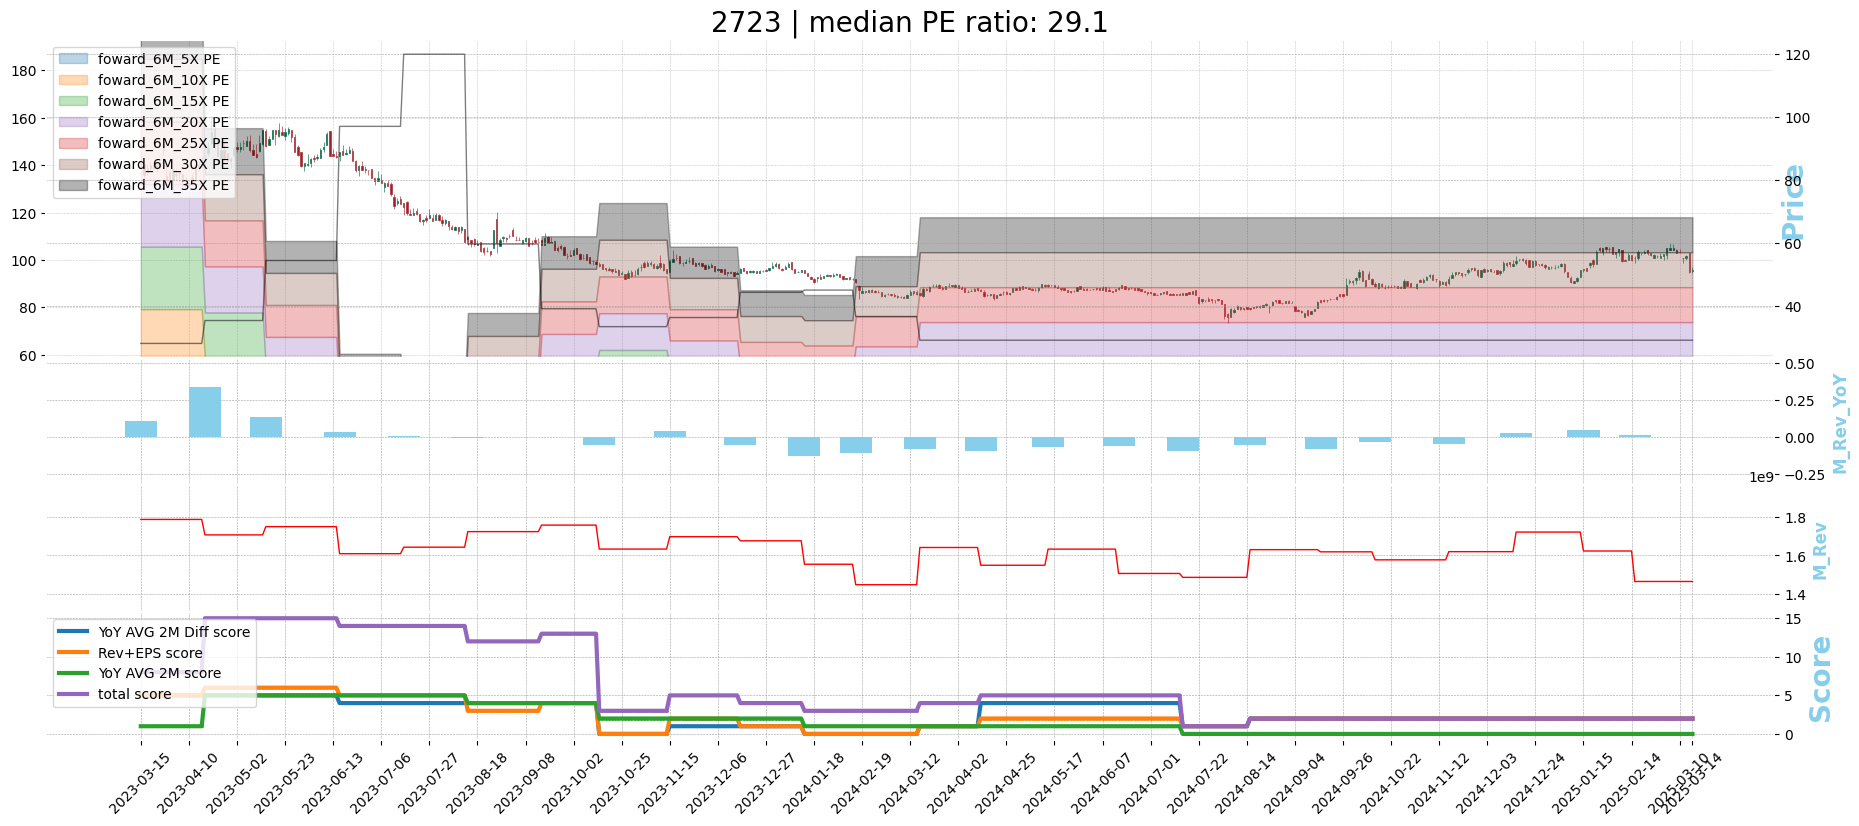

PE ratio mean: 41.12847236011131, PE ratio std: 22.518404306692023, PE ratio mid: 29.058738967119634


In [20]:
import matplotlib.pyplot as plt
import mplfinance as mpf
# K 線圖
# large candlestick chart with OHLC data


# 設定字體大小變數
fontsize1 = 20  # 主標題、座標軸標籤
fontsize2 = 16  # 圖例、刻度、標籤
plot_scan_stock_score_df = scan_stock_score_df.iloc[-N_month:]
first_date = plot_scan_stock_score_df.index[0]
last_date = plot_scan_stock_score_df.index[-1]
plot_scan_stock_df = scan_stock_df.loc[scan_stock_df.index >= first_date]
# plot_scan_stock_df = plot_scan_stock_df.loc[plot_scan_stock_df.index <= last_date]
plot_scan_stock_df.index = pd.to_datetime(plot_scan_stock_df.index)
# 假設 plot_scan_stock_score_df 已經準備好，且 index 為時間

# 設定 Seaborn 風格
plt.style.use('seaborn-whitegrid')

PE_ratio_announced = 'foward_'
# PE_ratio_announced = 'unannounced_'
# PE_ratio_announced = 'announced_'
plot_pe = True


start_index = plot_scan_stock_df.index[0]
end_index = plot_scan_stock_df.index[-1]
plot_df = pd.DataFrame([], index = pd.date_range(start_index, end_index, freq='D'))
plot_df[['Open', 'High', 'Low', 'Close', 'Adj Close']] = plot_scan_stock_df[['Open', 'High', 'Low', 'Close', 'Adj Close']]
plot_df['M_Rev_YoY'] = plot_scan_stock_score_df['M_Rev_YoY']
plot_df[f'{PE_ratio_announced}5X_PE_ratio'] = plot_scan_stock_score_df[f'{PE_ratio_announced}5X_PE_ratio']
plot_df[f'{PE_ratio_announced}10X_PE_ratio'] = plot_scan_stock_score_df[f'{PE_ratio_announced}10X_PE_ratio']
plot_df[f'{PE_ratio_announced}15X_PE_ratio'] = plot_scan_stock_score_df[f'{PE_ratio_announced}15X_PE_ratio']
plot_df[f'{PE_ratio_announced}20_PE_ratio'] = plot_scan_stock_score_df[f'{PE_ratio_announced}20_PE_ratio']
plot_df[f'{PE_ratio_announced}25X_PE_ratio'] = plot_scan_stock_score_df[f'{PE_ratio_announced}25X_PE_ratio']
plot_df[f'{PE_ratio_announced}30X_PE_ratio'] = plot_scan_stock_score_df[f'{PE_ratio_announced}30X_PE_ratio']
plot_df[f'{PE_ratio_announced}35X_PE_ratio'] = plot_scan_stock_score_df[f'{PE_ratio_announced}35X_PE_ratio']
plot_df[f'{PE_ratio_announced}40X_PE_ratio'] = plot_scan_stock_score_df[f'{PE_ratio_announced}40X_PE_ratio']
plot_df[f'{PE_ratio_announced}PE_ratio'] = plot_scan_stock_score_df[f'{PE_ratio_announced}PE_ratio']

scan_metric = ['YoY_AVG_2M_Diff_score', 'Rev+EPS_score', 'YoY_AVG_2M_score', 'total_score']
plot_df['YoY_AVG_2M_Diff_score'] = plot_scan_stock_score_df['YoY_AVG_2M_Diff_score']
plot_df['Rev+EPS_score'] = plot_scan_stock_score_df['Rev+EPS_score']
plot_df['YoY_AVG_2M_score'] = plot_scan_stock_score_df['YoY_AVG_2M_score']
plot_df['total_score'] = plot_scan_stock_score_df['total_score']

plot_df['M_Rev'] = plot_scan_stock_score_df['M_Rev']



## fillnan with previous value
plot_df['M_Rev_YoY'] = plot_df['M_Rev_YoY'].fillna(method='ffill')
plot_df[f'{PE_ratio_announced}5X_PE_ratio'] = plot_df[f'{PE_ratio_announced}5X_PE_ratio'].fillna(method='ffill')
plot_df[f'{PE_ratio_announced}10X_PE_ratio'] = plot_df[f'{PE_ratio_announced}10X_PE_ratio'].fillna(method='ffill')
plot_df[f'{PE_ratio_announced}15X_PE_ratio'] = plot_df[f'{PE_ratio_announced}15X_PE_ratio'].fillna(method='ffill')
plot_df[f'{PE_ratio_announced}20_PE_ratio'] = plot_df[f'{PE_ratio_announced}20_PE_ratio'].fillna(method='ffill')
plot_df[f'{PE_ratio_announced}25X_PE_ratio'] = plot_df[f'{PE_ratio_announced}25X_PE_ratio'].fillna(method='ffill')
plot_df[f'{PE_ratio_announced}30X_PE_ratio'] = plot_df[f'{PE_ratio_announced}30X_PE_ratio'].fillna(method='ffill')
plot_df[f'{PE_ratio_announced}35X_PE_ratio'] = plot_df[f'{PE_ratio_announced}35X_PE_ratio'].fillna(method='ffill')
plot_df[f'{PE_ratio_announced}40X_PE_ratio'] = plot_df[f'{PE_ratio_announced}40X_PE_ratio'].fillna(method='ffill')
plot_df[f'{PE_ratio_announced}PE_ratio'] = plot_df[f'{PE_ratio_announced}PE_ratio'].fillna(method='ffill')
plot_df['YoY_AVG_2M_Diff_score'] = plot_df['YoY_AVG_2M_Diff_score'].fillna(method='ffill')
plot_df['Rev+EPS_score'] = plot_df['Rev+EPS_score'].fillna(method='ffill')
plot_df['YoY_AVG_2M_score'] = plot_df['YoY_AVG_2M_score'].fillna(method='ffill')
plot_df['total_score'] = plot_df['total_score'].fillna(method='ffill')
plot_df['M_Rev'] = plot_df['M_Rev'].fillna(method='ffill')

plot_df.dropna(inplace=True)
## replace same value in M_Rev_YoY, keep only the last one same value, other will be nan
plot_df['M_Rev_YoY'] = plot_df['M_Rev_YoY'].mask(plot_df['M_Rev_YoY'].shift() == plot_df['M_Rev_YoY'])

# plot_df['5X_PE_ratio'] = plot_df['5X_PE_ratio'].mask(plot_df['5X_PE_ratio'].shift() == plot_df['5X_PE_ratio'])
# plot_df['10X_PE_ratio'] = plot_df['10X_PE_ratio'].mask(plot_df['10X_PE_ratio'].shift() == plot_df['10X_PE_ratio'])
# plot_df['15X_PE_ratio'] = plot_df['15X_PE_ratio'].mask(plot_df['15X_PE_ratio'].shift() == plot_df['15X_PE_ratio'])
# plot_df['20_PE_ratio'] = plot_df['20_PE_ratio'].mask(plot_df['20_PE_ratio'].shift() == plot_df['20_PE_ratio'])
# plot_df['25X_PE_ratio'] = plot_df['25X_PE_ratio'].mask(plot_df['25X_PE_ratio'].shift() == plot_df['25X_PE_ratio'])
# plot_df['30X_PE_ratio'] = plot_df['30X_PE_ratio'].mask(plot_df['30X_PE_ratio'].shift() == plot_df['30X_PE_ratio'])




# **取得 K 線圖所需數據**
dates = plot_df.index
adj_close = plot_df['Adj Close']
opens = plot_df['Open']
highs = plot_df['High']
lows = plot_df['Low']
closes = plot_df['Close']
plot_df['Open'] = opens + (adj_close - closes)
plot_df['High'] = highs + (adj_close - closes)
plot_df['Low'] = lows + (adj_close - closes)
plot_df['Close'] = adj_close




# **設定 K 線顏色**
colors = ['red' if close < open_ else 'blue' for open_, close in zip(opens, closes)]



# **畫實體（開盤價到收盤價）**
# bar_width = 0.7  # 設定 K 線柱體寬度
# for date, open_, close, color in zip(dates, opens, closes, colors):
#     ax1.bar(date, close - open_, width=bar_width, bottom=min(open_, close), color=color, edgecolor='black')

#     # **畫影線（high-low）**
# ax1.vlines(dates, lows, highs, color='black', linewidth=0.5)

M_Rev_YoY_plot = mpf.make_addplot(plot_df['M_Rev_YoY'], panel=1, type='bar', ylabel='M_Rev_YoY', color='skyblue', width=10)

M_Rev_plot = mpf.make_addplot(plot_df['M_Rev'], panel=2, type='line', ylabel='M_Rev', color='red', width=1)

color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#d62728', '#8c564b', 'black']

score_plot = mpf.make_addplot(plot_df['YoY_AVG_2M_Diff_score'], panel=3, type='line', ylabel='Score', color=color_list[0], width=1)

fig, axes = mpf.plot(
        plot_df[['Open', 'High', 'Low', 'Close']],
        type='candle',
        style='charles',
        addplot=[M_Rev_YoY_plot, M_Rev_plot, score_plot],
        returnfig=True,
        figsize=(24, 10),
        volume=False  # Disable default volume plot as custom volume plot is used
)

# axes[0].bar(range(len(plot_df.index.values)), plot_df['M_Rev_YoY'],
#         width=10, label='M_Rev_YoY', color='skyblue', alpha=0.3)

pe_ax = axes[0]

alpha = 0.3
pe_labels = [f'{PE_ratio_announced}{str(foward_month)+"M_" if PE_ratio_announced == "foward_" else ""}5X PE', 
             f'{PE_ratio_announced}{str(foward_month)+"M_" if PE_ratio_announced == "foward_" else ""}10X PE', 
             f'{PE_ratio_announced}{str(foward_month)+"M_" if PE_ratio_announced == "foward_" else ""}15X PE', 
             f'{PE_ratio_announced}{str(foward_month)+"M_" if PE_ratio_announced == "foward_" else ""}20X PE', 
             f'{PE_ratio_announced}{str(foward_month)+"M_" if PE_ratio_announced == "foward_" else ""}25X PE', 
             f'{PE_ratio_announced}{str(foward_month)+"M_" if PE_ratio_announced == "foward_" else ""}30X PE', 
             f'{PE_ratio_announced}{str(foward_month)+"M_" if PE_ratio_announced == "foward_" else ""}35X PE', 
             f'{PE_ratio_announced}{str(foward_month)+"M_" if PE_ratio_announced == "foward_" else ""}40X PE']


if plot_pe:
    pe_ax.fill_between(range(len(plot_df.index.values)), 
                    plot_df[f'{PE_ratio_announced}5X_PE_ratio'], 
                    plot_df[f'{PE_ratio_announced}10X_PE_ratio'], 
                    color=color_list[0], alpha=alpha, label=pe_labels[0])

    pe_ax.fill_between(range(len(plot_df.index.values)), 
                    plot_df[f'{PE_ratio_announced}10X_PE_ratio'], 
                    plot_df[f'{PE_ratio_announced}15X_PE_ratio'], 
                    color=color_list[1], alpha=alpha, label=pe_labels[1])

    pe_ax.fill_between(range(len(plot_df.index.values)), 
                    plot_df[f'{PE_ratio_announced}15X_PE_ratio'], 
                    plot_df[f'{PE_ratio_announced}20_PE_ratio'], 
                    color=color_list[2], alpha=alpha, label=pe_labels[2])

    pe_ax.fill_between(range(len(plot_df.index.values)), 
                    plot_df[f'{PE_ratio_announced}20_PE_ratio'], 
                    plot_df[f'{PE_ratio_announced}25X_PE_ratio'], 
                    color=color_list[3], alpha=alpha, label=pe_labels[3])
    pe_ax.fill_between(range(len(plot_df.index.values)), 
                    plot_df[f'{PE_ratio_announced}25X_PE_ratio'], 
                    plot_df[f'{PE_ratio_announced}30X_PE_ratio'], 
                    color=color_list[4], alpha=alpha, label=pe_labels[4])
    pe_ax.fill_between(range(len(plot_df.index.values)),
                    plot_df[f'{PE_ratio_announced}30X_PE_ratio'],
                    plot_df[f'{PE_ratio_announced}35X_PE_ratio'],
                    color=color_list[5], alpha=alpha, label=pe_labels[5])
    pe_ax.fill_between(range(len(plot_df.index.values)),
                    plot_df[f'{PE_ratio_announced}35X_PE_ratio'],
                    plot_df[f'{PE_ratio_announced}40X_PE_ratio'],
                    color=color_list[6], alpha=alpha, label=pe_labels[6])

pe_ratio_ax = axes[0].twinx()
pe_ratio_ax.plot(range(len(plot_df.index.values)), plot_df[f'{PE_ratio_announced}PE_ratio'], label=f'{PE_ratio_announced}PE_ratio', color='black', linewidth=1, alpha=0.5)

pe_ratio_std = plot_df[f'{PE_ratio_announced}PE_ratio'][:-12].std()
pe_ratio_mean = plot_df[f'{PE_ratio_announced}PE_ratio'][:-12].mean()
pe_ratio_mid = plot_df[f'{PE_ratio_announced}PE_ratio'][:-12].median()
print(f'PE ratio: {set(plot_df[f"{PE_ratio_announced}PE_ratio"])}')
# axes[2].set_ylabel('M_Rev_YoY', fontsize=fontsize1, color='skyblue')






scoe_ax = axes[6]
scan_metric = ['YoY_AVG_2M_Diff_score', 'Rev+EPS_score', 'YoY_AVG_2M_score', 'total_score']
for i, metric in enumerate(scan_metric):
    scoe_ax.plot(range(len(plot_df.index.values)), plot_df[metric], label=metric.replace('_', ' '), color=color_list[i], marker='o', linewidth=3, markersize=1)


x_tick = list(range(len(plot_df.index.values)))[::15]
x_tick_label = list(plot_df.index.astype(str))[::15]

# add last index
x_tick.append(len(plot_df.index.values)-1)
x_tick_label.append(plot_df.index.astype(str)[-1])
axes[0].set_ylabel('Price', fontsize=fontsize1, color='skyblue')
# axes[0].set_title(f'{scan_stock_id}', fontsize=fontsize1)
# axes[0].set_xticks(range(len(plot_df.index.astype(str)))[::15])
axes[0].set_xticks(x_tick, x_tick_label)
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].set_ylim(min(plot_df['Low'])*0.8, max(plot_df['High'])*1.2)


axes[2].set_ylabel('M_Rev_YoY', fontsize=12, color='skyblue')
axes[2].set_ylim(min(plot_df['M_Rev_YoY'])-0.2, max(plot_df['M_Rev_YoY'])+0.2)

axes[4].set_ylabel('M_Rev', fontsize=12, color='skyblue')
axes[4].set_ylim(min(plot_df['M_Rev'])*0.9, max(plot_df['M_Rev'])*1.1)




axes[6].set_ylabel('Score', fontsize=fontsize1, color='skyblue')
axes[6].legend(loc='upper left', fontsize=10)
# print(plot_df.index.astype(str))
# print(plot_df.index)
# axes.set_ylabel('M_Rev_YoY', fontsize=fontsize1, color='skyblue')
# ax1b.set_ylim(-0.5, 2)
# ax1b.tick_params(axis='y', labelcolor='skyblue', labelsize=fontsize2)

# **K 線圖改用 `twinx()`（共用 X 軸，而不是 `twiny()`）**
# ax1b.tick_params(axis='x', labelsize=fontsize2, rotation=45)

# plt.xticks(plot_df.index[::30], rotation=45, fontsize=fontsize2)

# 300dpi 的高解析度儲存
plt.title(f'{scan_stock_id} | median PE ratio: {pe_ratio_mid.round(1)}', fontsize=fontsize1)

plt.savefig('candlestick_chart.png', dpi=300)


plt.show()
print(f'PE ratio mean: {pe_ratio_mean}, PE ratio std: {pe_ratio_std}, PE ratio mid: {pe_ratio_mid}')

2723基本面分析
2723的分數(2024Q3 | 2025M2): 3/15


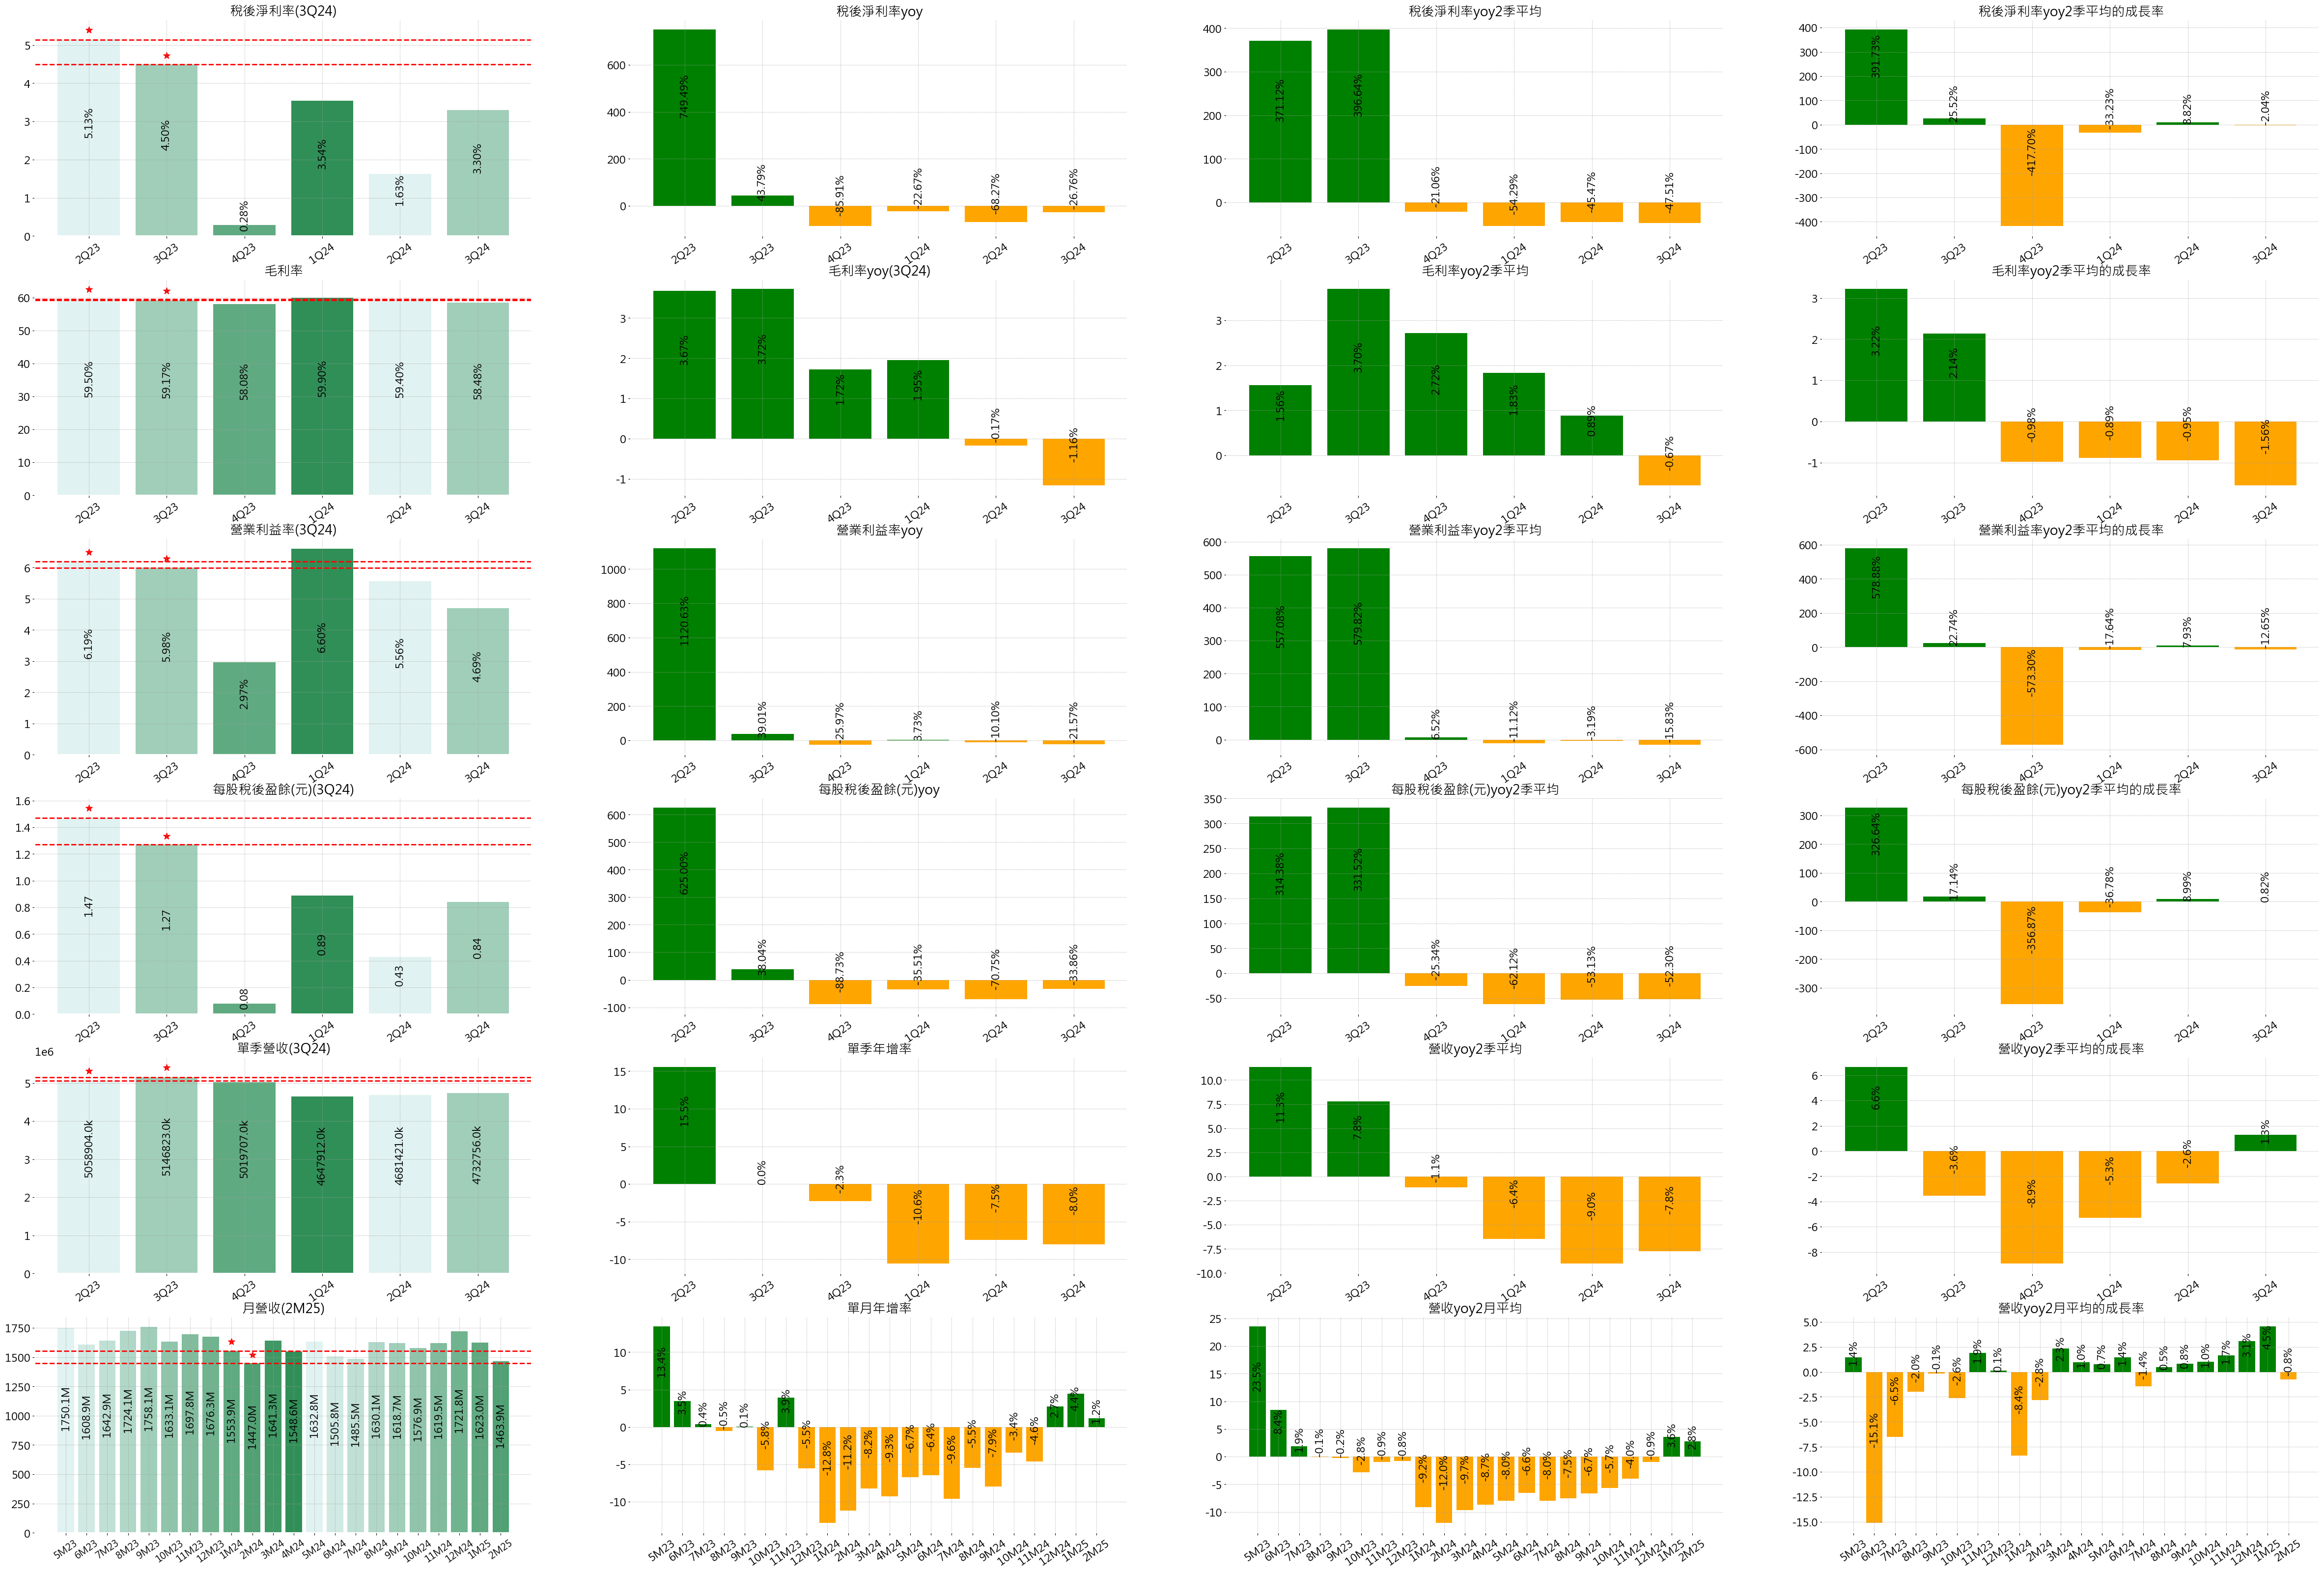

In [21]:
SF = StockFundamental(stockID=scan_stock_id, financial_statement_df=financial_statement_df, monthly_revenue_df=monthly_revenue_df, initial_time = '2023-05-20', end_time = '2025-03-28')
print(f'{SF.stockID}基本面分析')
plt.figure(figsize=(60, 40))
SF.plot_quarterly_Post_TaxPR()
SF.plot_quarterly_GPR()
SF.plot_quarterly_OPR()
SF.plot_quarterly_EPS()
SF.plot_quarterly_revenue()
SF.month_revenue()
SF.get_score()
plt.show()

### 時間內漲幅超過N%股票